### Steps to upgrade your sklearn library


In [1]:
#step1: Open Anaconda command line and run 'conda update conda'
#step2: Run 'conda install scikit-learn=0.21'

In [2]:
from sklearn.datasets import load_iris
import sklearn.tree as tr
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import sklearn
import matplotlib.pyplot as plt



In [3]:
print(sklearn.__version__)

0.21.3


In [4]:
iris_data=load_iris()

In [5]:
iris_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
print(iris_data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
X=pd.DataFrame(iris_data['data'],columns=iris_data['feature_names'])

In [8]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y=pd.Categorical.from_codes(iris_data['target'],iris_data['target_names'])

In [10]:
y

[setosa, setosa, setosa, setosa, setosa, ..., virginica, virginica, virginica, virginica, virginica]
Length: 150
Categories (3, object): [setosa, versicolor, virginica]

In [11]:
le=LabelEncoder()

In [12]:
y_enc=le.fit_transform(y)

In [13]:
y_enc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
dt=DecisionTreeClassifier(max_depth=10,criterion='gini',min_samples_leaf=8)

In [15]:
dt.fit(X,y_enc)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Visualization of Decision Tree Classifier

[Text(297.6, 391.392, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(223.20000000000002, 304.416, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(372.0, 304.416, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(223.20000000000002, 217.44, 'X[2] <= 4.85\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(148.8, 130.464, 'X[3] <= 1.45\ngini = 0.043\nsamples = 46\nvalue = [0, 45, 1]'),
 Text(74.4, 43.488, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(223.20000000000002, 43.488, 'gini = 0.165\nsamples = 11\nvalue = [0, 10, 1]'),
 Text(297.6, 130.464, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(520.8000000000001, 217.44, 'X[0] <= 6.05\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(446.40000000000003, 130.464, 'gini = 0.219\nsamples = 8\nvalue = [0, 1, 7]'),
 Text(595.2, 130.464, 'gini = 0.0\nsamples = 38\nvalue = [0, 0, 38]')]

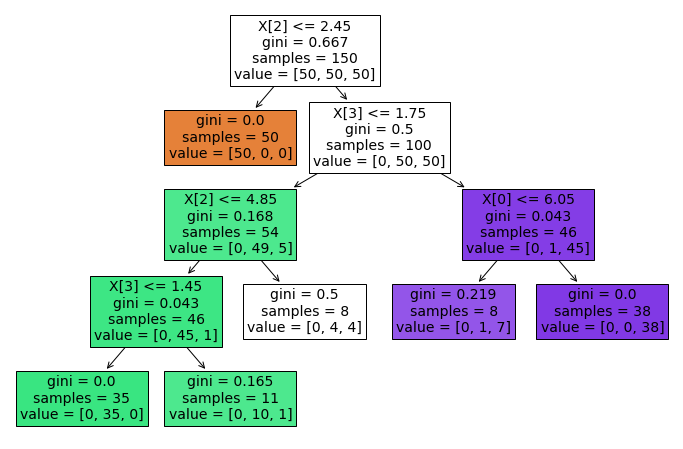

In [16]:
plt.figure(figsize=(12,8))
tr.plot_tree(dt,filled=True)

### Decision Tree Classifier Text

In [17]:
print(tr.export_text(dt))

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_3 <= 1.45
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.45
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 1
|   |--- feature_3 >  1.75
|   |   |--- feature_0 <= 6.05
|   |   |   |--- class: 2
|   |   |--- feature_0 >  6.05
|   |   |   |--- class: 2

